# **Praktikum 4 Machine Learning**


=================================================
### Nama : Samratul Fuadah Legahati
### NPM  : F1F022016
=================================================


# Latar Belakang

Random Forest merupakan salah satu algoritma machine learning berbasis ensemble yang banyak digunakan karena mampu menghasilkan prediksi yang stabil dan tahan terhadap noise. Metode ini bekerja dengan membangun banyak pohon keputusan secara acak, kemudian menggabungkan hasilnya untuk memperoleh prediksi akhir yang lebih akurat. Keunggulan utama Random Forest terletak pada kemampuannya menangani data berdimensi besar, hubungan antar variabel yang kompleks, serta mengurangi risiko overfitting yang sering muncul pada model pohon tunggal (Breuman,2021).

Dalam konteks praktikum, pemahaman tentang Random Forest sangat penting karena algoritma ini dapat digunakan baik untuk regresi maupun klasifikasi. Proses pembelajaran yang dilakukan secara paralel dan acak membantu model mengenali pola dari berbagai sudut pandang, sehingga performanya cenderung lebih kuat dibandingkan algoritma sederhana (Hastie dkk, 2009). Selain itu, Random Forest juga menyediakan informasi mengenai tingkat kepentingan setiap fitur, sehingga membantu mahasiswa memahami variabel mana yang paling berpengaruh dalam proses prediksi.

Dengan mempelajari Random Forest, praktikan dapat memahami salah satu pendekatan machine learning yang paling efektif dan serbaguna untuk menyelesaikan berbagai permasalahan data. Model ini tidak hanya mudah digunakan melalui berbagai library seperti Scikit-Learn, tetapi juga memberikan hasil yang kompetitif tanpa memerlukan pengaturan parameter yang rumit (Gero, 2019). Oleh karena itu, Random Forest menjadi materi penting dalam praktikum untuk membangun fondasi analisis data dan pemodelan prediktif yang kuat.

# Rumusan Masalah

1.  Bagaimana  konsep dasar Random Forest?
2. Bagaimana mengimplementasikan Random Forest untuk klasifikasi dan regresi
menggunakan scikit-learn?
3. Bagaimana melakukan evaluasi model menggunakan metrik performa?
4. Bagaimana menginterpretasikan hasil pemodelan?

# Tujuan Penelitian

1. Menjelaskan konsep dasar Random Forest.
2. Mengimplementasikan Random Forest untuk klasifikasi dan regresi
menggunakan scikit-learn.
3. Melakukan evaluasi model menggunakan metrik performa.
4. Menginterpretasikan hasil pemodelan.

# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [97]:
!pip install feature_engine

In [98]:
# Import Dasar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
# Import Scikit-learn Dasar & Utilitas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
# Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score

# Import Ensemble Methods (Gabungan)
from sklearn.ensemble import (
    VotingClassifier,
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    StackingClassifier
)

# Memuat Data

Sebelum kita membahas lebih jauh tentang Feature Engineering, berikut ini adalah beberapa dataset yang akan digunakan untuk memperjelas tujuan dari notebook ini.

In [99]:

# Load penelitian Dataset

df_ori = pd.read_csv('https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/Dataset%20salary%202024.csv', sep=';')
data_pt1 = df_ori.copy()
data_pt1.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,US,0,US,M
5,2024,SE,FT,Machine Learning Engineer,160000,USD,US,0,US,M
6,2024,MI,FT,ML Engineer,400000,USD,US,0,US,M
7,2024,MI,FT,ML Engineer,65000,USD,US,0,US,M
8,2024,EN,FT,Data Analyst,101520,USD,US,0,US,M
9,2024,EN,FT,Data Analyst,45864,USD,US,0,US,M


In [100]:
# Melihat dimensi data
data_pt1.shape

(16534, 10)

In [101]:
#melihat tipe data
data_pt1.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
employee_residence,object
remote_ratio,int64
company_location,object
company_size,object


# Analisis Data Eksploratif

# _Feature Engineering_

## A - Missing Value

Data hilang (***missing data***) atau nilai hilang (***missing values***) terjadi ketika tidak ada data atau nilai yang tersimpan untuk suatu observasi pada variabel tertentu.

Kehilangan data adalah hal yang sering terjadi, baik dalam kompetisi data science maupun di dunia bisnis, dan dapat mempengaruhi kesimpulan yang diambil dari data tersebut. **Data yang tidak lengkap merupakan masalah yang tidak bisa dihindari saat bekerja dengan berbagai sumber data.**

---
### - Kenapa data hilang (data missing)?

Ada berbagai alasan mengapa data bisa hilang, antara lain:
* Nilai bisa **hilang** atau **tidak tersimpan dengan benar** saat proses pengumpulan data.
  
  Misalnya, data berasal dari survei yang diisi secara manual ke dalam formulir online. Petugas entri data bisa saja lupa mengisi satu kolom dalam formulir tersebut, sehingga nilai pada kolom itu menjadi hilang.

* **Nilai memang tidak ada.**

  Contohnya: untuk variabel yang dihitung dari hasil pembagian antara dua variabel, seperti rasio utang terhadap pendapatan. Jika seseorang tidak memiliki pendapatan, maka nilai rasio tersebut tidak dapat dihitung karena pembagian dengan nol tidak terdefinisi.


* Data hilang juga bisa terjadi karena **responden menolak menjawab** pertanyaan tertentu dalam formulir.
  
  Misalnya, seseorang mungkin enggan mengungkapkan jumlah pendapatannya. Akibatnya, nilai untuk variabel “pendapatan” akan menjadi hilang bagi orang tersebut.

Selain memahami penyebab hilangnya data, **penting juga untuk memahami mekanisme bagaimana nilai-nilai yang hilang itu muncul dalam dataset**.
Tergantung pada mekanismenya, kita bisa memilih untuk memproses nilai yang hilang dengan cara yang berbeda. Selain itu, dengan mengetahui sumber data yang hilang, kita juga bisa mengambil langkah untuk mengendalikan sumber tersebut, dan mengurangi jumlah data yang hilang di masa depan selama proses pengumpulan data.

In [102]:
# Check Missing Values

data_pt1.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
employee_residence,0
remote_ratio,0
company_location,0
company_size,0


In [103]:
# Check Missing Values as Percentage to Total Data

data_pt1.isnull().mean()

,0
work_year,0.0
experience_level,0.0
employment_type,0.0
job_title,0.0
salary,0.0
salary_currency,0.0
employee_residence,0.0
remote_ratio,0.0
company_location,0.0
company_size,0.0


### Penanganan Data Missing

Tidak perlu meggunakan penanganan data missing karena tidak ditemukan data yang hilang pada dataset

## B - Kardinalitas

Pengecekan kardinalitas (jumlah nilai unik) di tahap awal sangat krusial karena langkah ini menentukan strategi encoding (pengubahan teks ke angka) yang aman agar tidak merusak kinerja model Anda. Dalam dataset Anda, ditemukan bahwa kolom seperti job_title memiliki kardinalitas tinggi (155 jenis pekerjaan). Jika Anda tidak mengecek kardinalitas terlebih dahulu dan langsung menerapkan metode standar seperti One-Hot Encoding, dataset Anda akan mengalami "ledakan dimensi" (bertambah ratusan kolom baru secara instan), yang menyebabkan proses pelatihan menjadi sangat lambat dan model rentan mengalami overfitting.

Dengan mengetahui kardinalitas sejak awal, Anda bisa mengambil keputusan cerdas untuk memilah teknik yang tepat: menggunakan Frequency Encoding untuk kolom dengan variasi tinggi (seperti Jabatan dan Lokasi) agar hemat memori, dan hanya menggunakan One-Hot Encoding atau Ordinal Mapping untuk kolom dengan variasi rendah (seperti employment_type atau experience_level). Intinya, pengecekan kardinalitas adalah langkah pencegahan agar dataset Anda tetap ringkas, efisien, dan mudah dipelajari oleh algoritma machine learning.

In [104]:
# Cek jumlah nilai unik (kardinalitas) setiap kolom
data_pt1.nunique()

,0
work_year,5
experience_level,4
employment_type,4
job_title,155
salary,2560
salary_currency,23
employee_residence,88
remote_ratio,3
company_location,77
company_size,3


In [105]:
# Cek 10 Pekerjaan paling sering muncul
print("Top 10 Job Titles:")
print(data_pt1['job_title'].value_counts().head(10))

print("\nTop 10 Lokasi Perusahaan:")
print(data_pt1['company_location'].value_counts().head(10))

Top 10 Job Titles:
job_title
Data Engineer                3464
Data Scientist               3314
Data Analyst                 2440
Machine Learning Engineer    1705
Research Scientist            531
Applied Scientist             435
Data Architect                435
Analytics Engineer            431
Research Engineer             306
Data Science                  271
Name: count, dtype: int64

Top 10 Lokasi Perusahaan:
company_location
US    14518
GB      694
CA      455
ES      133
DE      105
FR       65
IN       63
AU       57
NL       32
PT       28
Name: count, dtype: int64


/tmp/ipython-input-3727386071.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job_title', data=data_pt1, order=top_jobs, palette='viridis')


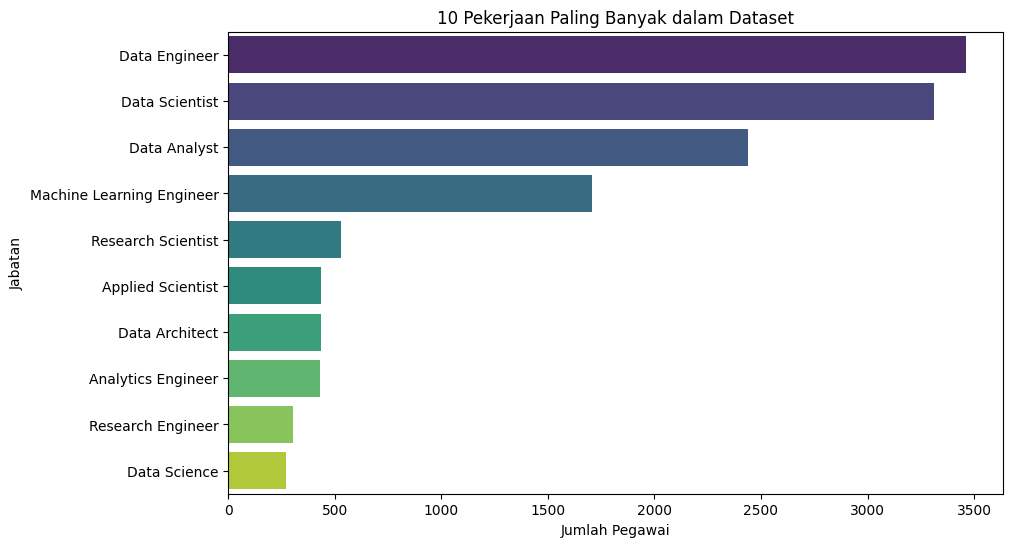

In [106]:

# Ambil 10 pekerjaan teratas
top_jobs = data_pt1['job_title'].value_counts().head(10).index

plt.figure(figsize=(10, 6))
sns.countplot(y='job_title', data=data_pt1, order=top_jobs, palette='viridis')
plt.title('10 Pekerjaan Paling Banyak dalam Dataset')
plt.xlabel('Jumlah Pegawai')
plt.ylabel('Jabatan')
plt.show()

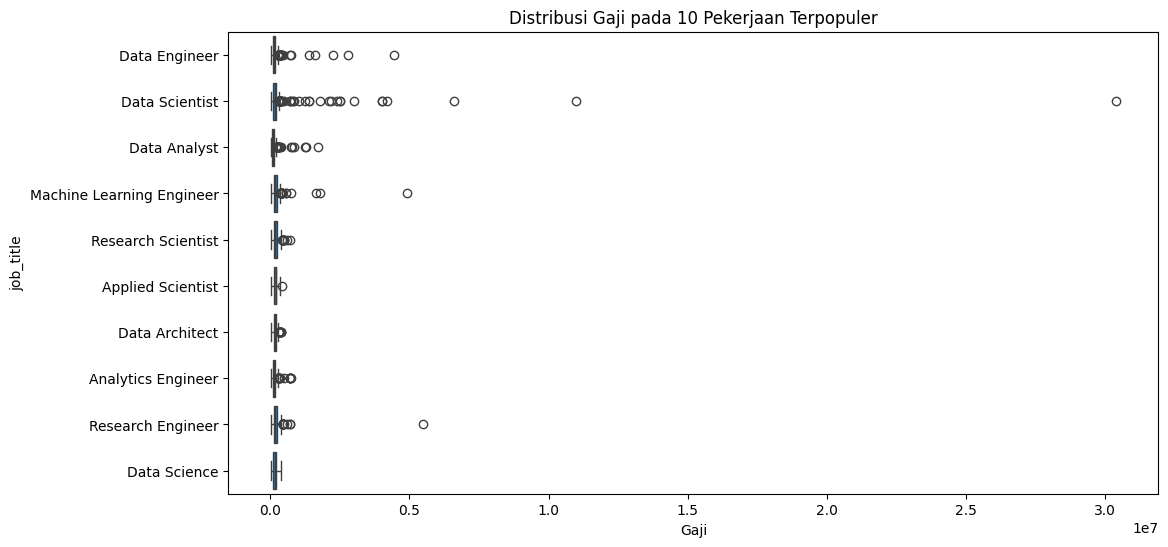

In [107]:
plt.figure(figsize=(12, 6))
# Filter data hanya untuk 10 pekerjaan teratas
data_top_jobs = data_pt1[data_pt1['job_title'].isin(top_jobs)]

sns.boxplot(x='salary', y='job_title', data=data_top_jobs, order=top_jobs)
plt.title('Distribusi Gaji pada 10 Pekerjaan Terpopuler')
plt.xlabel('Gaji')
plt.show()

In [108]:
# 1. Buat Kamus Kurs (Exchange Rates ke USD)
# Angka ini adalah estimasi kurs.
rates = {
    'USD': 1.0,
    'EUR': 1.07,   # Euro
    'GBP': 1.25,   # Poundsterling
    'INR': 0.012,  # Rupee India
    'CAD': 0.74,   # Dolar Kanada
    'AUD': 0.65,   # Dolar Australia
    'SGD': 0.74,   # Dolar Singapura
    'CHF': 1.10,   # Franc Swiss
    'JPY': 0.0068, # Yen Jepang (Penting! Nominalnya biasanya jutaan)
    'CNY': 0.14,   # Yuan China
    'TRY': 0.032,  # Lira Turki
    'BRL': 0.20,   # Real Brazil
    'MXN': 0.058,  # Peso Mexico
    'HUF': 0.0028, # Forint Hungaria (Penting! Nominal jutaan)
    'DKK': 0.14,   # Krone Denmark
    'PLN': 0.25,   # Zloty Polandia
    'CLP': 0.0011, # Peso Chili (Penting! Nominal jutaan)
    # Jika ada mata uang lain di data Anda yang belum ada di sini, tambahkan manual.
}

# 2. Fungsi untuk konversi
def convert_to_usd(row):
    currency = row['salary_currency']
    amount = row['salary']

    if currency in rates:
        return amount * rates[currency]
    else:
        # Jika mata uang tidak ada di kamus, kembalikan None (nanti bisa dicek)
        return None

# 3. Terapkan ke Dataset
data_pt1['salary_in_usd'] = data_pt1.apply(convert_to_usd, axis=1)

# 4. Cek apakah ada yang gagal dikonversi (NaN)
print("Jumlah data gagal konversi:", data_pt1['salary_in_usd'].isnull().sum())

# 5. Tampilkan perbandingan
data_pt1[['salary', 'salary_currency', 'salary_in_usd']].head()

Jumlah data gagal konversi: 10


,salary,salary_currency,salary_in_usd
0,202730,USD,202730.0
1,92118,USD,92118.0
2,130500,USD,130500.0
3,96000,USD,96000.0
4,190000,USD,190000.0


In [109]:
# Melihat mata uang yang gagal dikonversi
missing_currencies = data_pt1[data_pt1['salary_in_usd'].isnull()]['salary_currency'].unique()
print("Mata uang yang belum ada di kamus:", missing_currencies)

Mata uang yang belum ada di kamus: ['ILS' 'NZD' 'PHP' 'NOK' 'ZAR' 'HKD' 'THB']


In [110]:
# 1. Update kamus rates dengan mata uang yang hilang
# (Menggunakan fungsi .update() agar tidak perlu mengetik ulang semuanya)
rates.update({
    'ILS': 0.27,   # Israeli New Shekel
    'NZD': 0.61,   # New Zealand Dollar
    'PHP': 0.018,  # Philippine Peso
    'NOK': 0.094,  # Norwegian Krone
    'ZAR': 0.053,  # South African Rand
    'HKD': 0.13,   # Hong Kong Dollar
    'THB': 0.028   # Thai Baht
})

# 2. Jalankan ulang konversi
data_pt1['salary_in_usd'] = data_pt1.apply(convert_to_usd, axis=1)

# 3. Cek ulang (Seharusnya sekarang hasilnya 0)
print("Jumlah data gagal konversi:", data_pt1['salary_in_usd'].isnull().sum())

# Tampilkan hasil
data_pt1[['salary', 'salary_currency', 'salary_in_usd']].head()

Jumlah data gagal konversi: 0


,salary,salary_currency,salary_in_usd
0,202730,USD,202730.0
1,92118,USD,92118.0
2,130500,USD,130500.0
3,96000,USD,96000.0
4,190000,USD,190000.0


In [111]:
# === TAHAP 1: MEMBERSIHKAN OUTLIER (Gaji Ekstrem) ===

# Hitung batas wajar (IQR) pada kolom salary_in_usd
Q1 = data_pt1['salary_in_usd'].quantile(0.25)
Q3 = data_pt1['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data
data_clean = data_pt1[
    (data_pt1['salary_in_usd'] >= lower_bound) &
    (data_pt1['salary_in_usd'] <= upper_bound)
].copy() # Pakai .copy() agar aman

# Hapus kolom lama yang tidak dipakai
data_clean = data_clean.drop(columns=['salary', 'salary_currency'])

print(f"Data awal: {len(data_pt1)} baris")
print(f"Data bersih: {len(data_clean)} baris")

Data awal: 16534 baris
Data bersih: 16252 baris


In [112]:


# Gunakan data yang sudah bersih
df_encoded = data_clean.copy()

# ---------------------------------------------------------
# A. ORDINAL ENCODING (Data Bertingkat)
# ---------------------------------------------------------
# Mapping manual untuk data yang punya urutan
level_map = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
size_map  = {'S': 1, 'M': 2, 'L': 3}

df_encoded['experience_level'] = df_encoded['experience_level'].map(level_map)
df_encoded['company_size']     = df_encoded['company_size'].map(size_map)

# ---------------------------------------------------------
# B. FREQUENCY ENCODING (High Cardinality)
# ---------------------------------------------------------
# Untuk kolom dengan banyak variasi (Job, Lokasi), ubah jadi frekuensi kemunculannya
cols_high_card = ['job_title', 'company_location', 'employee_residence']

for col in cols_high_card:
    freq_map = df_encoded[col].value_counts()
    df_encoded[col + '_freq'] = df_encoded[col].map(freq_map)

# ---------------------------------------------------------
# C. ONE-HOT ENCODING (Nominal Sedikit)
# ---------------------------------------------------------
# Untuk employment_type (Full time, Part time, dll)
df_encoded = pd.get_dummies(df_encoded, columns=['employment_type'], prefix='emp')

# ---------------------------------------------------------
# D. MEMBERSIHKAN KOLOM ASLI
# ---------------------------------------------------------
# Hapus kolom teks asli yang sudah diubah (agar tidak error di model)
cols_to_drop = ['job_title', 'company_location', 'employee_residence']
df_final = df_encoded.drop(columns=cols_to_drop)

print("Encoding Selesai!")
print("Dimensi Data Akhir:", df_final.shape)
df_final.head()

Encoding Selesai!
Dimensi Data Akhir: (16252, 12)


,work_year,experience_level,remote_ratio,company_size,salary_in_usd,job_title_freq,company_location_freq,employee_residence_freq,emp_CT,emp_FL,emp_FT,emp_PT
0,2024,3,0,2,202730.0,114,14249,14199,False,False,True,False
1,2024,3,0,2,92118.0,114,14249,14199,False,False,True,False
2,2024,3,0,2,130500.0,3446,14249,14199,False,False,True,False
3,2024,3,0,2,96000.0,3446,14249,14199,False,False,True,False
4,2024,3,0,2,190000.0,1639,14249,14199,False,False,True,False


## C- Splitting Data

In [113]:


# --- LANGKAH 1: DEFINISIKAN X DAN y ---
# (Ini bagian yang tadi hilang)
# X = Semua kolom KECUALI gaji
X = df_final.drop(columns=['salary_in_usd'])
# y = Hanya kolom gaji
y = df_final['salary_in_usd']

# --- LANGKAH 2: LAKUKAN SPLITTING ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=46,
    shuffle=True  # Pastikan diacak
)

print("Splitting Berhasil!")
print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)

Splitting Berhasil!
Shape X_train: (13001, 11)
Shape X_test: (3251, 11)


## D- Handling Outlier

Data sudah melewati filter IQR. Jika  memotong lagi sekarang, malah berisiko membuang data valid (data gaji tinggi tapi wajar) yang justru penting dipelajari oleh model.

## E- Scaling

Scaling diperlukan karena setiap kolom dalam dataset memiliki rentang angka yang sangat berbeda. Salary_in_usd bisa mencapai ratusan ribu, sedangkan experience_level hanya bernilai satuan dan remote_ratio berkisar nol sampai seratus. Perbedaan skala ini membuat beberapa algoritma mudah tertipu dan menganggap fitur dengan angka besar lebih penting, padahal belum tentu benar.

Dengan scaling, semua fitur diubah ke skala yang setara sehingga model membaca tiap kolom secara seimbang. Tujuan utamanya adalah memastikan model mempelajari pola berdasarkan informasi yang sebenarnya, bukan karena perbedaan besar kecilnya angka.

In [114]:
# ==========================================================
# TAHAP 1: CEK SKEWNESS (Untuk menentukan jenis Scaler)
# ==========================================================

# List penampung
nilai_skew = []
nilai_skew_normal = []

# Loop untuk setiap kolom di X_train
for i in X_train.columns:
    # Hitung skewness
    skewness = X_train[i].skew()

    # Logika pengelompokan (-0.5 s.d 0.5 dianggap normal)
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(i)
    else:
        nilai_skew.append(i)

# Menampilkan hasil
print(f'Kolom Skewness Normal (Pakai StandardScaler): {len(nilai_skew_normal)} kolom')
print(nilai_skew_normal)
print('\n' + '-'*50 + '\n')
print(f'Kolom Skewness Tinggi (Pakai MinMaxScaler): {len(nilai_skew)} kolom')
print(nilai_skew)

Kolom Skewness Normal (Pakai StandardScaler): 1 kolom
['job_title_freq']

--------------------------------------------------

Kolom Skewness Tinggi (Pakai MinMaxScaler): 10 kolom
['work_year', 'experience_level', 'remote_ratio', 'company_size', 'company_location_freq', 'employee_residence_freq', 'emp_CT', 'emp_FL', 'emp_FT', 'emp_PT']


In [115]:


# Inisialisasi Scaler
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

# 1. Scaling Kolom Normal (StandardScaler)
# Hanya untuk kolom: ['job_title_freq']
if len(nilai_skew_normal) > 0:
    X_train[nilai_skew_normal] = scaler_std.fit_transform(X_train[nilai_skew_normal])
    X_test[nilai_skew_normal]  = scaler_std.transform(X_test[nilai_skew_normal])

# 2. Scaling Kolom Skew (MinMaxScaler)
# Untuk 10 kolom lainnya
if len(nilai_skew) > 0:
    X_train[nilai_skew] = scaler_mm.fit_transform(X_train[nilai_skew])
    X_test[nilai_skew]  = scaler_mm.transform(X_test[nilai_skew])

# Cek hasil 5 baris pertama (semua angka sekarang harusnya kecil, antara 0-1 atau mendekatinya)
X_train.head()

,work_year,experience_level,remote_ratio,company_size,job_title_freq,company_location_freq,employee_residence_freq,emp_CT,emp_FL,emp_FT,emp_PT
4827,1.0,0.666667,0.0,0.5,0.932121,1.000000,1.000000,0.0,0.0,1.0,0.0
2365,1.0,0.666667,0.0,0.5,0.932121,0.048217,0.047824,0.0,0.0,1.0,0.0
1975,1.0,0.333333,0.0,0.5,-1.444446,1.000000,1.000000,0.0,0.0,1.0,0.0
15851,0.5,0.333333,0.0,0.5,-0.264181,1.000000,1.000000,0.0,0.0,1.0,0.0
15029,0.5,0.666667,0.0,0.5,1.053136,1.000000,1.000000,0.0,0.0,1.0,0.0


## F- Encoding

Encoding tidak perlu dilakukan lagi karena proses tersebut sudah dikerjakan pada tahap awal sebelum pembagian data dan sebelum scaling. Scaling hanya bisa bekerja pada data berbentuk angka. Jika masih ada teks, proses scaling pasti gagal. Karena scaling berhasil dijalankan, berarti seluruh data sudah dalam bentuk numerik. Mengulang encoding justru berisiko mengacaukan struktur data yang sudah siap dipakai.

## G- Balancing Data

Balancing data (seperti SMOTE, Undersampling, atau Oversampling) hanya dilakukan untuk kasus Klasifikasi (prediksi Kategori, misal: Jantung/Sehat, Macet/Lancar).

Kasus ini adalah Regresi (prediksi Angka Gaji), sehingga konsep "Balancing Kelas" tidak berlaku karena tidak ada "Kelas" di data target, yang ada hanyalah angka kontinu.

# _Training Model_

## A - _Bagging_

In [116]:
# Model Training - Random Forest - Using Decision Tree as Base Model


# Inisialisasi Model Regresi
rnd_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,      # Membatasi kedalaman pohon agar tidak overfitting
    random_state=42
)

# Melatih model (Fit ke data yang sudah di-scaling)
rnd_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [117]:
# Model Evaluation


# Lakukan prediksi
y_train_pred = rnd_reg.predict(X_train) # Gunakan X_train yg sudah di-scaling
y_test_pred = rnd_reg.predict(X_test)

# Gunakan MAE (Mean Absolute Error) & R2 Score
print('MAE Score - Train - Random Forest :', mean_absolute_error(y_train, y_train_pred))
print('MAE Score - Test  - Random Forest :', mean_absolute_error(y_test, y_test_pred))

print('-' * 50)

print('R2 Score - Train - Random Forest  :', r2_score(y_train, y_train_pred))
print('R2 Score - Test  - Random Forest  :', r2_score(y_test, y_test_pred))

MAE Score - Train - Random Forest : 38364.49332114098
MAE Score - Test  - Random Forest : 38243.75922006741
--------------------------------------------------
R2 Score - Train - Random Forest  : 0.3402096139148346
R2 Score - Test  - Random Forest  : 0.3389503198162539


/tmp/ipython-input-4068471548.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')


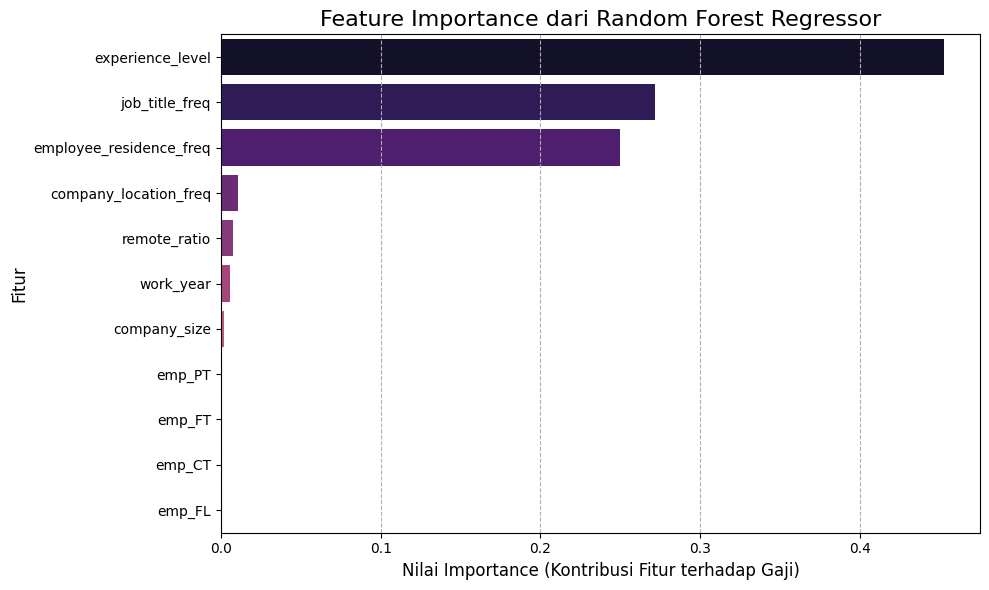


--- Hasil Feature Importance ---
                    Feature  Importance
1          experience_level    0.452569
4            job_title_freq    0.271802
6   employee_residence_freq    0.250015
5     company_location_freq    0.010517
2              remote_ratio    0.007379
0                 work_year    0.005659
3              company_size    0.001810
10                   emp_PT    0.000195
9                    emp_FT    0.000046
7                    emp_CT    0.000008
8                    emp_FL    0.000000


In [118]:

# 1. Ambil Nama Fitur dan Nilai Importance
feature_names = X_train.columns
importances = rnd_reg.feature_importances_

# 2. Buat DataFrame untuk visualisasi
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. Visualisasikan Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')

# Ubah judul agar sesuai (Regressor, bukan Classifier)
plt.title('Feature Importance dari Random Forest Regressor', fontsize=16)
plt.xlabel('Nilai Importance (Kontribusi Fitur terhadap Gaji)', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

print("\n--- Hasil Feature Importance ---")
print(importance_df)

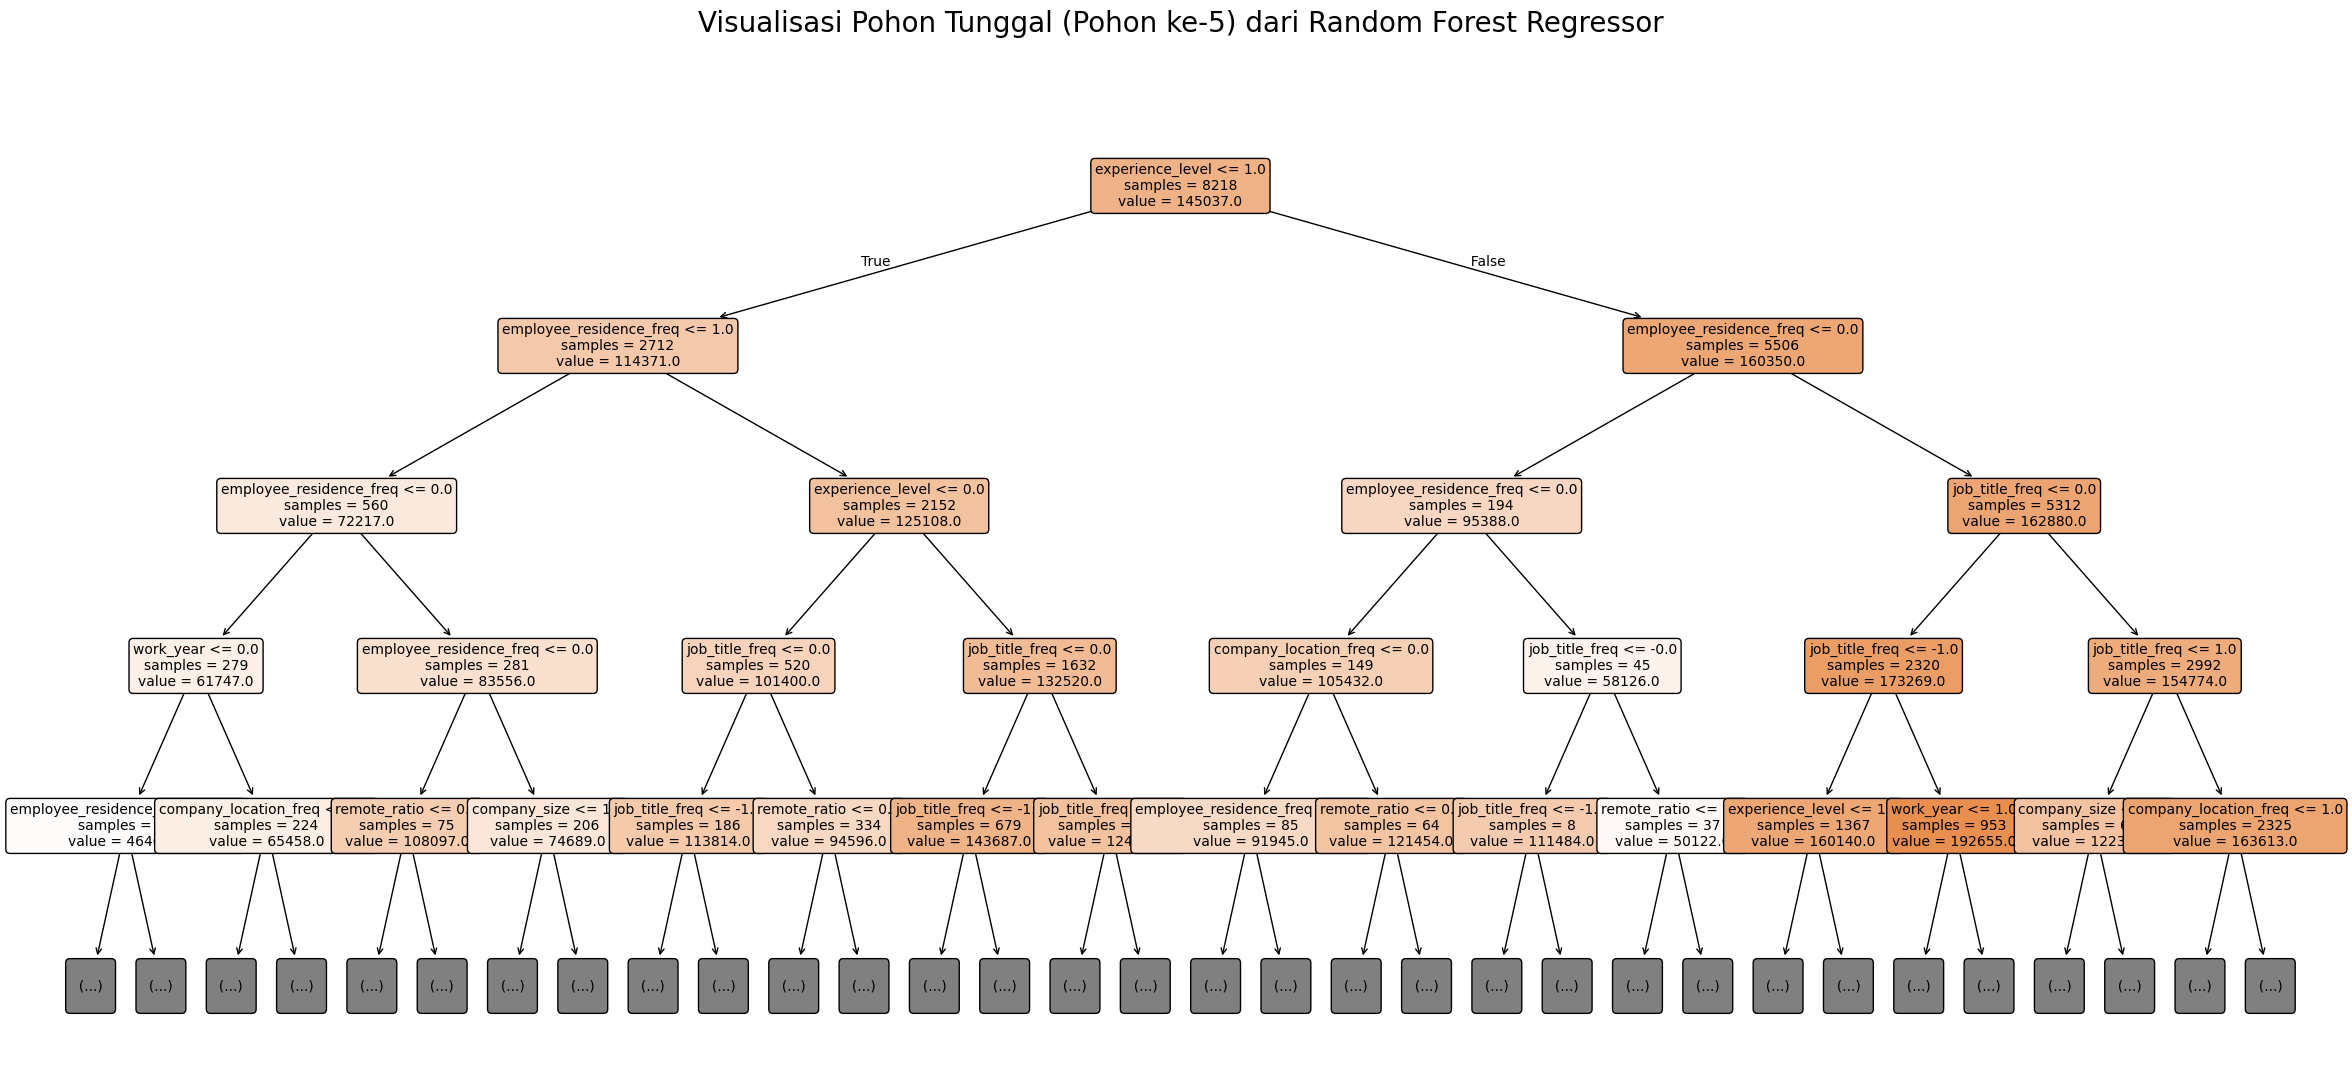

In [119]:

# 1. Definisikan Model & Fitur
best_model = rnd_reg  # Gunakan model Regressor kita
feature_names = X_train.columns

# 2. Ambil satu pohon (misal pohon ke-5 / indeks 4)
pohon_tunggal = best_model.estimators_[4]

# 3. Siapkan Canvas
fig, ax = plt.subplots(figsize=(25, 12))
fig.subplots_adjust(top=0.9, bottom=0.1, left=0.05, right=0.95)

# 4. Plot Tree
plot_tree(
    pohon_tunggal,
    ax=ax,
    feature_names=feature_names,
    class_names=None,  # PENTING: Harus None karena ini REGRESI (bukan klasifikasi bunga)
    filled=True,       # Warna makin gelap = Gaji makin tinggi
    rounded=True,
    impurity=False,    # Hilangkan tulisan 'squared_error' agar rapi
    proportion=False,
    max_depth=4,       # Batasi kedalaman agar tulisan terbaca
    fontsize=10,
    precision=0        # Bulatkan angka gaji (tanpa desimal)
)

fig.suptitle(f"Visualisasi Pohon Tunggal (Pohon ke-5) dari Random Forest Regressor", fontsize=20, y=0.98)

plt.show()

In [120]:
# Model Training - Bagging Regressor - Using Linear Regression as Base Model


# Inisialisasi Model Bagging
bag_reg = BaggingRegressor(
    estimator=LinearRegression(),  # Menggunakan Linear Regression sebagai base model
    n_estimators=200,
    random_state=42
)

# Melatih model
bag_reg.fit(X_train, y_train)


BaggingRegressor(estimator=LinearRegression(), n_estimators=200,
                 random_state=42)

In [121]:
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Lakukan Prediksi
# Gunakan model 'bag_reg' yang baru saja kita latih
y_train_pred = bag_reg.predict(X_train)
y_test_pred  = bag_reg.predict(X_test)

# 2. Evaluasi dengan MAE & R2
# MAE: Rata-rata kesalahan dalam USD
print('MAE Score - Train - Bagging :', mean_absolute_error(y_train, y_train_pred))
print('MAE Score - Test  - Bagging :', mean_absolute_error(y_test, y_test_pred))

print('-' * 50)

# R2: Seberapa akurat model (Mendekati 1.0 = Sempurna)
print('R2 Score - Train - Bagging  :', r2_score(y_train, y_train_pred))
print('R2 Score - Test  - Bagging  :', r2_score(y_test, y_test_pred))

MAE Score - Train - Bagging : 41621.24972397849
MAE Score - Test  - Bagging : 41790.80172958262
--------------------------------------------------
R2 Score - Train - Bagging  : 0.23209358201186425
R2 Score - Test  - Bagging  : 0.23101236087877774


In [122]:


# 1. Definisi Model
# Kita gunakan Decision Tree sebagai "otak" dasar karena lebih fleksibel di-tuning daripada Linear Regression
bag_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    random_state=42
)

# 2. Parameter Grid (Disesuaikan untuk Regresi)
param_dist = {
    # Jumlah pohon yang dibangun
    'n_estimators': [50, 100, 200, 300],
    # Berapa % data yang diambil untuk latih 1 pohon (0.5 = 50% data)
    'max_samples': [0.5, 0.7, 0.9, 1.0],
    # Apakah sampling boleh berulang?
    'bootstrap': [True, False],
    # Kedalaman pohon (agar tidak overfitting)
    'estimator__max_depth': [5, 10, 20, None],
    'estimator__min_samples_split': [2, 5, 10]
}

# 3. Setup Randomized Search
random_search = RandomizedSearchCV(
    estimator=bag_reg,
    param_distributions=param_dist,
    n_iter=10,  # Mencoba 10 kombinasi acak
    scoring='neg_mean_absolute_error', # PENTING: Cari error terkecil (outputnya negatif)
    cv=5,       # 5-Fold Cross Validation
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 4. Lakukan Tuning (Training)
print("Sedang mencari parameter terbaik...")
# Gunakan X_train dan y_train (bukan encoded)
random_search.fit(X_train, y_train)

print("\nParameter Terbaik Ditemukan:")
print(random_search.best_params_)

print("\nSkor Terbaik (Negative MAE):")
print(random_search.best_score_)

Sedang mencari parameter terbaik...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Parameter Terbaik Ditemukan:
{'n_estimators': 200, 'max_samples': 0.5, 'estimator__min_samples_split': 5, 'estimator__max_depth': 20, 'bootstrap': True}

Skor Terbaik (Negative MAE):
-37170.02803772273


In [123]:


# 1. Prediksi menggunakan model terbaik hasil tuning (random_search)
# Gunakan X_train dan X_test yang sudah di-scaling
y_train_pred = random_search.predict(X_train)
y_test_pred  = random_search.predict(X_test)

# 2. Evaluasi (Ganti F1 Score dengan MAE & R2)
print('MAE Score - Train - Bagging (Tuned) :', mean_absolute_error(y_train, y_train_pred))
print('MAE Score - Test  - Bagging (Tuned) :', mean_absolute_error(y_test, y_test_pred))

print('-' * 50)

print('R2 Score - Train - Bagging (Tuned)  :', r2_score(y_train, y_train_pred))
print('R2 Score - Test  - Bagging (Tuned)  :', r2_score(y_test, y_test_pred))

MAE Score - Train - Bagging (Tuned) : 34912.162962176626
MAE Score - Test  - Bagging (Tuned) : 37002.762526298706
--------------------------------------------------
R2 Score - Train - Bagging (Tuned)  : 0.4438212588253768
R2 Score - Test  - Bagging (Tuned)  : 0.3786546925694234


## B - _Votting_


*Ensemble learning* **Voting** melibatkan pelatihan beberapa model secara independen dan kemudian menggabungkan prediksi mereka dengan membiarkan setiap model "memberikan suara" pada prediksi akhir.

Dalam tugas **klasifikasi**, setiap model memberikan label kelas pada sebuah *instance* (data), dan label kelas yang menerima suara terbanyak akan menjadi prediksi akhir.

**Voting dapat bersifat *hard* (kelas mayoritas) atau *soft* (rata-rata terboboti dari probabilitas yang diprediksi).**

*Voting* mirip dengan *Bagging*, tetapi menggunakan semua data latih.

In [124]:


# 1. Linear Regression (Pengganti Logistic Regression)
# Linear Regression tidak perlu parameter C atau random_state
lin_reg = LinearRegression()

# 2. SVR (Pengganti SVC)
# probability=True dihapus karena SVR tidak menghasilkan probabilitas, tapi angka
svm_reg = SVR(kernel='rbf')

# 3. Decision Tree Regressor (Pengganti Decision Tree Classifier)
dt_reg = DecisionTreeRegressor(max_depth=6, random_state=42)


In [125]:


# Inisialisasi Voting Regressor
# Kita gabungkan Linear Regression, SVR, dan Decision Tree yang sudah didefinisikan tadi
voting_reg = VotingRegressor(
    estimators=[
        ('lin', lin_reg),  # Linear Regression
        ('svr', svm_reg),  # Support Vector Regressor
        ('dt', dt_reg)     # Decision Tree Regressor
    ]
)

# Melatih Model Voting
print("Sedang melatih Voting Regressor...")
voting_reg.fit(X_train, y_train)



Sedang melatih Voting Regressor...


VotingRegressor(estimators=[('lin', LinearRegression()), ('svr', SVR()),
                            ('dt',
                             DecisionTreeRegressor(max_depth=6,
                                                   random_state=42))])

In [126]:


# 1. Lakukan Prediksi
# Hanya ada 1 tipe prediksi di Voting Regressor (Rata-rata)
y_test_pred = voting_reg.predict(X_test)

# 2. Evaluasi
print('MAE Score - Test - Voting Regressor :', mean_absolute_error(y_test, y_test_pred))
print('R2 Score - Test - Voting Regressor  :', r2_score(y_test, y_test_pred))

MAE Score - Test - Voting Regressor : 40669.96498210732
R2 Score - Test - Voting Regressor  : 0.2675363822914333


In [127]:


# 1. Ambil 1 sampel data dari X_test sebagai simulasi "Orang Baru"
new_instance = X_test.iloc[[10]]

# 2. Lakukan Prediksi
# Gunakan model terbaik Anda (misal: voting_reg atau random_search)
hasil_prediksi = voting_reg.predict(new_instance)

# 3. Tampilkan Hasil
print("Data Fitur Input (Scaled):")
print(new_instance.values)
print("-" * 30)

print(f"Prediksi Gaji Model : ${hasil_prediksi[0]:,.2f}")
print(f"Gaji Asli (Kunci)   : ${y_test.iloc[10]:,.2f}")

# Cek selisihnya
selisih = abs(hasil_prediksi[0] - y_test.iloc[10])
print(f"Selisih Error       : ${selisih:,.2f}")

Data Fitur Input (Scaled):
[[1.         0.66666667 0.         0.5        0.31538007 1.
  1.         0.         0.         1.         0.        ]]
------------------------------
Prediksi Gaji Model : $143,698.36
Gaji Asli (Kunci)   : $73,100.00
Selisih Error       : $70,598.36


In [128]:
# Prediksi Individual dari Setiap Model dalam Voting Regressor

# 1. Prediksi Linear Regression
# Kita akses model di dalam 'voting_reg' menggunakan nama 'lin'
print('From Linear Regression : ', voting_reg.named_estimators_['lin'].predict(new_instance))

# 2. Prediksi SVR (Support Vector Regressor)
# Kita akses menggunakan nama 'svr'
print('From SVR               : ', voting_reg.named_estimators_['svr'].predict(new_instance))

# 3. Prediksi Decision Tree
# Kita akses menggunakan nama 'dt'
print('From Decision Tree     : ', voting_reg.named_estimators_['dt'].predict(new_instance))

print('-' * 50)

# 4. Hasil Akhir (Rata-rata dari ketiganya)
# Ini adalah hasil 'predict' langsung dari voting_reg
print('Final Result (Average) : ', voting_reg.predict(new_instance))

From Linear Regression :  [167061.09724135]
From SVR               :  [140091.39088842]
From Decision Tree     :  [123942.59183673]
--------------------------------------------------
Final Result (Average) :  [143698.35998884]


## C - _Boosting_

In [129]:


# 1. Base Model: Linear Regression (Sesuai permintaan)
# Catatan: Linear Regression tidak memiliki parameter 'solver', jadi kita kosongkan saja
lin_reg_base = LinearRegression()

# 2. Inisialisasi AdaBoost Regressor
ada_reg = AdaBoostRegressor(
    estimator=lin_reg_base,
    n_estimators=500,
    random_state=42
)

# 3. Training Model
# Gunakan X_train (scaled) dan y_train (data gaji asli)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(estimator=LinearRegression(), n_estimators=500,
                  random_state=42)

In [130]:


# 1. Lakukan Prediksi
# Gunakan model 'ada_reg' (bukan clf)
y_train_pred = ada_reg.predict(X_train)
y_test_pred  = ada_reg.predict(X_test)

# 2. Evaluasi (Ganti F1 dengan MAE & R2)
# MAE: Rata-rata selisih error (Dolar)
print('MAE Score - Train - AdaBoost :', mean_absolute_error(y_train, y_train_pred))
print('MAE Score - Test  - AdaBoost :', mean_absolute_error(y_test, y_test_pred))

print('-' * 50)

# R2: Akurasi kecocokan data
print('R2 Score - Train - AdaBoost  :', r2_score(y_train, y_train_pred))
print('R2 Score - Test  - AdaBoost  :', r2_score(y_test, y_test_pred))

MAE Score - Train - AdaBoost : 43399.76008078036
MAE Score - Test  - AdaBoost : 43616.31721197444
--------------------------------------------------
R2 Score - Train - AdaBoost  : 0.20509370059257281
R2 Score - Test  - AdaBoost  : 0.1998298338625748


In [131]:


# Model AdaBoost Default (untuk Regresi)
ada_reg = AdaBoostRegressor(
    n_estimators=10,
    random_state=42
)

# Training Model
# Gunakan X_train dan y_train (data gaji asli)
ada_reg.fit(X_train, y_train)


AdaBoostRegressor(n_estimators=10, random_state=42)

In [132]:


# 1. Lakukan Prediksi
# Gunakan model 'ada_reg' (bukan ada_clf)
y_train_pred = ada_reg.predict(X_train)
y_test_pred  = ada_reg.predict(X_test)

# 2. Evaluasi (Ganti F1 dengan MAE & R2)
print('MAE Score - Train - AdaBoost Default :', mean_absolute_error(y_train, y_train_pred))
print('MAE Score - Test  - AdaBoost Default :', mean_absolute_error(y_test, y_test_pred))

print('-' * 50)

print('R2 Score - Train - AdaBoost Default  :', r2_score(y_train, y_train_pred))
print('R2 Score - Test  - AdaBoost Default  :', r2_score(y_test, y_test_pred))

MAE Score - Train - AdaBoost Default : 42774.40741038048
MAE Score - Test  - AdaBoost Default : 42683.13494923386
--------------------------------------------------
R2 Score - Train - AdaBoost Default  : 0.2360570730414676
R2 Score - Test  - AdaBoost Default  : 0.2410408152654986


In [133]:
from sklearn.ensemble import GradientBoostingRegressor

# Inisialisasi Model Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Training Model
# Gunakan X_train dan y_train (data gaji asli)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=500, random_state=42)

In [134]:


# 1. Lakukan Prediksi
# Gunakan model 'gb_reg' (bukan clf)
y_train_pred = gb_reg.predict(X_train)
y_test_pred  = gb_reg.predict(X_test)

# 2. Evaluasi (Ganti F1 dengan MAE & R2)
print('MAE Score - Train - Gradient Boosting :', mean_absolute_error(y_train, y_train_pred))
print('MAE Score - Test  - Gradient Boosting :', mean_absolute_error(y_test, y_test_pred))

print('-' * 50)

print('R2 Score - Train - Gradient Boosting  :', r2_score(y_train, y_train_pred))
print('R2 Score - Test  - Gradient Boosting  :', r2_score(y_test, y_test_pred))

MAE Score - Train - Gradient Boosting : 36106.13729983491
MAE Score - Test  - Gradient Boosting : 36784.738867521955
--------------------------------------------------
R2 Score - Train - Gradient Boosting  : 0.41001052354336165
R2 Score - Test  - Gradient Boosting  : 0.38551193782730087


In [135]:


# Inisialisasi XGBoost Regressor
xgb_reg = xgb.XGBRegressor(
    n_estimators=500,
    eta=0.1,             # Learning Rate
    max_depth=3,
    random_state=42,
    n_jobs=-1            # Menggunakan semua core CPU agar training cepat
)

# Training Model
# Gunakan X_train dan y_train (data gaji asli)
xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, feature_weights=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1, ...)

In [136]:


# 1. Lakukan Prediksi
# Gunakan model 'xgb_reg' (bukan clf)
y_train_pred = xgb_reg.predict(X_train)
y_test_pred  = xgb_reg.predict(X_test)

# 2. Evaluasi (Ganti F1 dengan MAE & R2)
print('MAE Score - Train - XGB :', mean_absolute_error(y_train, y_train_pred))
print('MAE Score - Test  - XGB :', mean_absolute_error(y_test, y_test_pred))

print('-' * 50)

print('R2 Score - Train - XGB  :', r2_score(y_train, y_train_pred))
print('R2 Score - Test  - XGB  :', r2_score(y_test, y_test_pred))

MAE Score - Train - XGB : 36131.298608977566
MAE Score - Test  - XGB : 36748.41443000471
--------------------------------------------------
R2 Score - Train - XGB  : 0.40911649662264193
R2 Score - Test  - XGB  : 0.3866809369251647


## D - _Stacking_

In [137]:

# 1. Tentukan Base Learners (Model Lapis Pertama)
# Kita gabungkan Linear Regression dan SVR
estimators = [
     ('lin', LinearRegression()),
     ('svr', SVR(kernel='rbf'))
]

# 2. Tentukan Final Estimator (Model Lapis Kedua / Meta-Learner)
# Model ini bertugas menggabungkan hasil prediksi dari Lapis Pertama
final_model = DecisionTreeRegressor(max_depth=6, random_state=42)

# 3. Inisialisasi Stacking Regressor
stacking_reg = StackingRegressor(
    estimators=estimators,
    final_estimator=final_model
)

# 4. Training
print("Sedang melatih Stacking Regressor...")
# Gunakan X_train dan y_train (data asli)
stacking_reg.fit(X_train, y_train)


Sedang melatih Stacking Regressor...


StackingRegressor(estimators=[('lin', LinearRegression()), ('svr', SVR())],
                  final_estimator=DecisionTreeRegressor(max_depth=6,
                                                        random_state=42))

In [138]:


# 1. Lakukan Prediksi
# Gunakan model 'stacking_reg' (bukan clf)
y_train_pred = stacking_reg.predict(X_train)
y_test_pred  = stacking_reg.predict(X_test)

# 2. Evaluasi (Ganti F1 dengan MAE & R2)
# MAE: Rata-rata selisih error (Dolar)
print('MAE Score - Train - Stacking :', mean_absolute_error(y_train, y_train_pred))
print('MAE Score - Test  - Stacking :', mean_absolute_error(y_test, y_test_pred))

print('-' * 50)

# R2: Akurasi kecocokan data
print('R2 Score - Train - Stacking  :', r2_score(y_train, y_train_pred))
print('R2 Score - Test  - Stacking  :', r2_score(y_test, y_test_pred))

MAE Score - Train - Stacking : 41783.10696389755
MAE Score - Test  - Stacking : 42025.82584982526
--------------------------------------------------
R2 Score - Train - Stacking  : 0.18971865598045445
R2 Score - Test  - Stacking  : 0.19493546735735146


# _Model Performance_

1. Evaluasi Stacking Regressor - TRAIN
--- Performa: Data Training ---
MAE (Mean Absolute Error) : $41,783.11
R2 Score                  : 0.1897


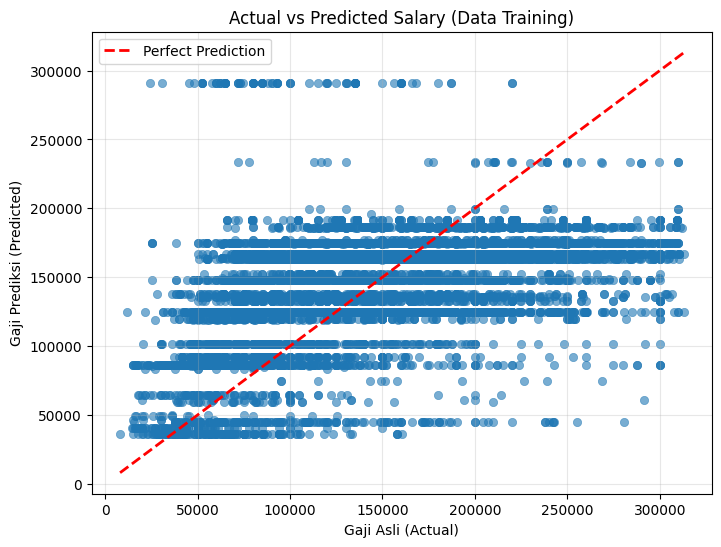



2. Evaluasi Stacking Regressor - TEST
--- Performa: Data Testing ---
MAE (Mean Absolute Error) : $42,025.83
R2 Score                  : 0.1949


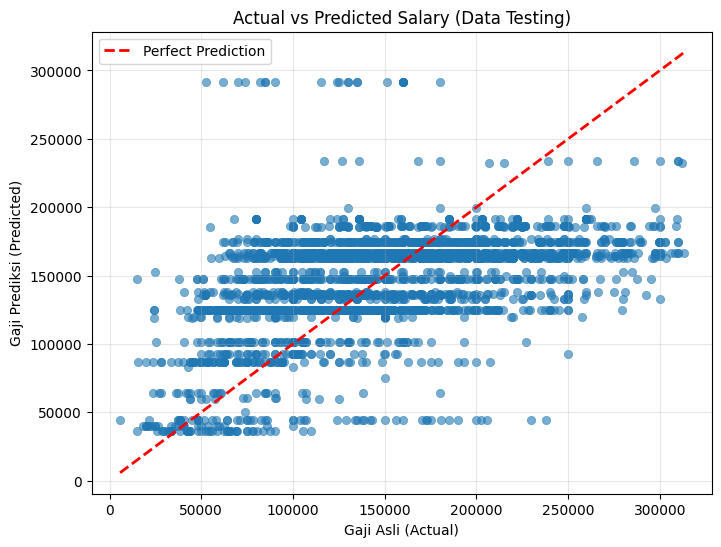

In [139]:


def performance_check(model, X, y, title_text):
    # 1. Lakukan Prediksi
    y_pred = model.predict(X)

    # 2. Tampilkan Metrik Evaluasi
    print(f"--- Performa: {title_text} ---")
    print(f"MAE (Mean Absolute Error) : ${mean_absolute_error(y, y_pred):,.2f}")
    print(f"R2 Score                  : {r2_score(y, y_pred):.4f}")

    # 3. Visualisasi Actual vs Predicted
    # Idealnya, titik-titik data harus menempel pada garis merah diagonal
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y, y=y_pred, alpha=0.6, edgecolor=None)

    # Buat garis diagonal merah (Garis Sempurna)
    # Jika titik pas di garis merah, berarti prediksi 100% tepat
    min_val = min(y.min(), y_pred.min())
    max_val = max(y.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

    plt.title(f'Actual vs Predicted Salary ({title_text})')
    plt.xlabel('Gaji Asli (Actual)')
    plt.ylabel('Gaji Prediksi (Predicted)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# --- EKSEKUSI FUNGSI ---

print('1. Evaluasi Stacking Regressor - TRAIN')
# Gunakan model 'stacking_reg' yang sudah kita latih
performance_check(stacking_reg, X_train, y_train, "Data Training")

print('\n' + '='*50 + '\n')

print('2. Evaluasi Stacking Regressor - TEST')
performance_check(stacking_reg, X_test, y_test, "Data Testing")

Berdasarkan hasil evaluasi, model Stacking Regressor menunjukkan performa yang tergolong rendah (underfitting). Hal ini terlihat dari nilai R2 Score yang hanya berkisar di angka 0.19 (atau 19%), baik pada data latih (training) maupun data uji (testing). Angka ini mengindikasikan bahwa kombinasi model ini hanya mampu menjelaskan sekitar 19% dari pola variasi gaji yang ada dalam dataset, sementara 81% informasi lainnya gagal ditangkap oleh model. Meskipun skor antara training dan testing sangat mirip yang menandakan model stabil dan tidak overfitting namun stabilitas tersebut berada pada tingkat akurasi yang buruk.

Dari segi tingkat kesalahan, nilai MAE (Mean Absolute Error) berada di kisaran $42,000. Angka ini menunjukkan bahwa rata-rata prediksi gaji yang dihasilkan model meleset sekitar 42 ribu dolar dari gaji aslinya. Dalam konteks estimasi gaji profesional, selisih sebesar ini tergolong signifikan dan kurang ideal untuk dijadikan acuan. Besarnya error ini menegaskan bahwa model kesulitan membedakan nuansa gaji antar pegawai dengan presisi tinggi.

Secara visual, grafik Actual vs Predicted memperlihatkan anomali berupa pola garis-garis horizontal yang bertingkat, bukannya titik-titik yang menyebar rapat mengikuti garis diagonal merah. Pola "patah-patah" ini disebabkan oleh penggunaan Decision Tree sebagai final estimator (juri akhir) dalam Stacking, yang cenderung mengelompokkan prediksi ke dalam beberapa nilai tetap yang kaku alih-alih menghasilkan angka kontinu yang mulus. Kesimpulannya, strategi Stacking dengan konfigurasi saat ini kurang efektif dibandingkan model Boosting (seperti XGBoost atau Gradient Boosting) yang umumnya lebih adaptif terhadap data tabular.

Sedang menghitung skor semua model...
Model Bagging (Linear) belum dilatih atau error: This BaggingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

=== KLASEMEN AKHIR PERBANDINGAN MODEL ===
                Model  MAE Score (Lower is Better)  \
4             XGBoost                 36748.414430   
3   Gradient Boosting                 36784.738868   
1     Bagging (Tuned)                 37002.762526   
0       Random Forest                 38243.759220   
5    Voting Regressor                 40669.964982   
2            AdaBoost                 42683.134949   
6  Stacking Regressor                 42025.825850   

   R2 Score (Higher is Better)  
4                     0.386681  
3                     0.385512  
1                     0.378655  
0                     0.338950  
5                     0.267536  
2                     0.241041  
6                     0.194935  


/tmp/ipython-input-3668290615.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score (Higher is Better)', y='Model', data=df_results, palette='viridis')


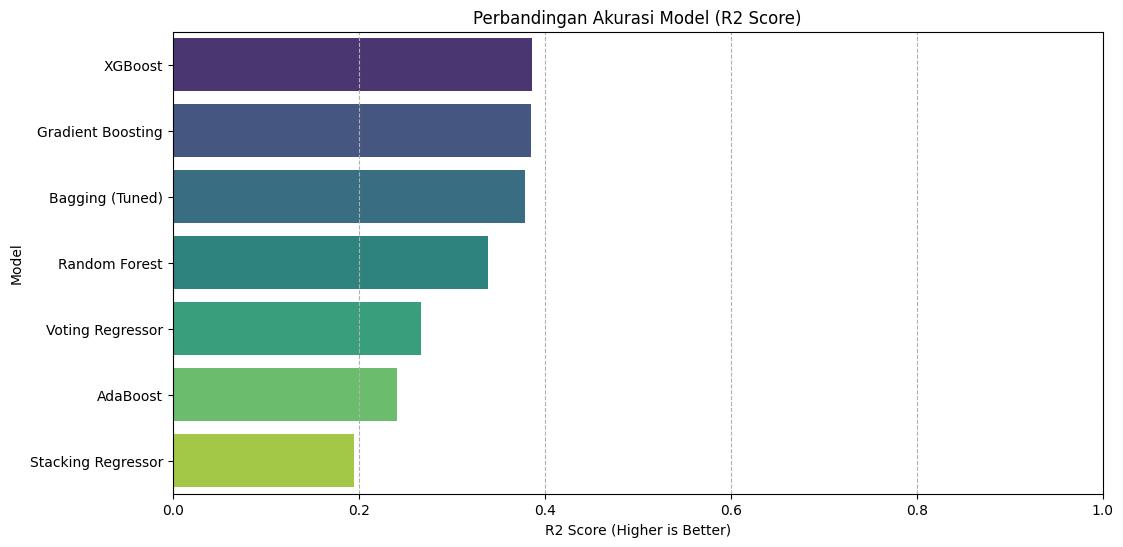

In [140]:


# 1. Daftar semua model yang sudah dilatih
# Pastikan nama variabelnya sesuai dengan yang tadi kita buat
models = {
    'Random Forest': rnd_reg,
    'Bagging (Linear)': bag_reg,        # Model Bagging awal
    'Bagging (Tuned)': random_search,   # Model Bagging hasil Tuning (jika dijalankan)
    'AdaBoost': ada_reg,
    'Gradient Boosting': gb_reg,
    'XGBoost': xgb_reg,
    'Voting Regressor': voting_reg,
    'Stacking Regressor': stacking_reg
}

# 2. Loop untuk mengevaluasi setiap model
results = []

print("Sedang menghitung skor semua model...")
for name, model in models.items():
    try:
        # Prediksi ke Data Test
        y_pred = model.predict(X_test)

        # Hitung Metrik
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Simpan hasil
        results.append({
            'Model': name,
            'MAE Score (Lower is Better)': mae,
            'R2 Score (Higher is Better)': r2
        })
    except Exception as e:
        print(f"Model {name} belum dilatih atau error: {e}")

# 3. Buat DataFrame dan Urutkan berdasarkan R2 Tertinggi
df_results = pd.DataFrame(results).sort_values(by='R2 Score (Higher is Better)', ascending=False)

# 4. Tampilkan Tabel
print("\n=== KLASEMEN AKHIR PERBANDINGAN MODEL ===")
print(df_results)

# 5. Visualisasi Perbandingan (Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(x='R2 Score (Higher is Better)', y='Model', data=df_results, palette='viridis')
plt.title('Perbandingan Akurasi Model (R2 Score)')
plt.xlim(0, 1) # Skala R2 dari 0 sampai 1
plt.grid(axis='x', linestyle='--')
plt.show()

Berdasarkan hasil perbandingan seluruh model, XGBoost muncul sebagai model terbaik dalam memprediksi gaji pegawai. Model ini menunjukkan performa paling konsisten karena memiliki tingkat kesalahan paling rendah dengan nilai MAE sebesar 36.748 dan akurasi paling tinggi dengan R2 sebesar 0.386 atau sekitar 38,6 persen. Di posisi kedua ada Gradient Boosting yang hasilnya hanya sedikit berbeda dari XGBoost, sehingga kedua model ini terbukti sangat cocok digunakan untuk data yang pola hubungannya rumit.

Sebaliknya, Stacking Regressor dan AdaBoost dengan dasar Linear Regression berada di posisi paling bawah. Kedua model ini hanya mampu menghasilkan nilai R2 sekitar 0.19 dan 0.24. Hasil ini menunjukkan bahwa model yang menggunakan pendekatan linear atau penggabungan model sederhana belum mampu mengikuti pola data gaji yang lebih kompleks, sehingga kinerjanya kalah jauh dibandingkan model berbasis pohon keputusan yang lebih fleksibel.

Walaupun XGBoost menjadi yang terbaik, nilai R2 yang masih berada di bawah 0.40 menandakan bahwa data gaji dalam penelitian ini dipengaruhi oleh banyak faktor lain yang belum tercatat. Dengan kata lain, fitur yang tersedia saat ini baru bisa menjelaskan sebagian kecil dari variasi gaji, sehingga penambahan variabel yang lebih lengkap akan sangat membantu meningkatkan akurasi model di masa depan.

# Kesimpulan

Berdasarkan percobaan yang dilakukan, dapat disimpulkan bahwa algoritma XGBoost menjadi model terbaik dalam memprediksi gaji pegawai pada dataset ini. XGBoost mampu menghasilkan kesalahan prediksi yang paling rendah dengan nilai MAE sekitar 36.748 dan memberikan nilai R2 sebesar 38,6 persen, yang merupakan nilai tertinggi dibandingkan model lainnya. Di posisi berikutnya ada Gradient Boosting dengan selisih performa yang sangat kecil. Hasil ini menunjukkan bahwa untuk data gaji yang pola hubungannya cukup kompleks, metode Boosting yang bekerja dengan cara memperbaiki kesalahan model sebelumnya secara bertahap mampu memberikan hasil yang lebih baik.

Sementara itu, model Stacking Regressor dan AdaBoost memberikan kinerja yang kurang memuaskan karena akurasinya berada di bawah 25 persen. Hal ini disebabkan oleh penggunaan Linear Regression sebagai dasar model. Hubungan antara jabatan, lokasi, dan pengalaman kerja terhadap besaran gaji ternyata tidak bersifat sederhana atau lurus. Ketika model dipaksa menggunakan pendekatan linear, variasi gaji yang ada justru tidak dapat ditangkap dengan baik sehingga performanya jauh lebih rendah dibandingkan model yang berbasis pohon keputusan seperti XGBoost.

Meskipun XGBoost menjadi yang terbaik, ada hal penting yang perlu diperhatikan. Kemampuan model ini dalam menjelaskan data baru hanya mencapai sekitar 38 persen. Artinya, fitur yang tersedia dalam dataset seperti jabatan, negara, dan tingkat pengalaman hanya mampu menjelaskan sebagian kecil faktor penentu gaji. Sisanya, sekitar 62 persen, kemungkinan dipengaruhi oleh faktor lain yang belum tercatat, misalnya kemampuan negosiasi, bonus tahunan, kondisi perusahaan, atau kebijakan internal. Untuk meningkatkan akurasi di masa mendatang, langkah yang lebih penting bukan hanya mencoba algoritma baru, tetapi menambah informasi atau variabel yang lebih detail agar gambaran mengenai faktor penentu gaji menjadi lebih lengkap.

# Referensi

Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5–32.

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning. Springer.

Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O’Reilly Media.